# Exploring sales advertising in the housing market in St. Petersburg 

### Data

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from statistics import mode

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/Users/anshilina/real_estate_data.csv', sep='\t')

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [5]:
# df.hist(figsize=(15,20), bins=20);

**Summary:** There are 23.6 thousand observations in the dataframe. There are outliers in many variables. A number of values are missing. For some variables data type is needed to be changed.

### Data preprocessing

#### Duplicates

Since we are going to group observations and analyse them within the group, it is necessary to get rid of duplicates.

Let's try to find and drop implicit duplicates in the `locality_name` variable.

In [6]:
# sorted(df['locality_name'].unique())

Firstly, fill missing values in the `locality_name` variable. Since we can't identify the location name using the available data, we'll fill in it with the 'unknown' value.

In [7]:
df.loc[df['locality_name'].isna(), 'locality_name'] =\
df.loc[df['locality_name'].isna(), 'locality_name'].fillna('unknown')

print('Number of missing values in "locality_name":', df['locality_name'].isna().sum())

Number of missing values in "locality_name": 0


Now let's unify the names of the values in the `locality_name` column using **regular expressions**. Therefore, we will drop implicit duplicates.

In [8]:
d = {}
def sorter(series):
    name = ' '.join(re.findall('(?:[A-ЯЁ])\w+', str(series)))
    locality_type = ' '.join(re.findall(r'\b[а-яё]+\b', str(series)))
    if name not in d.keys():
        d[name] = locality_type
        return ' '.join([d[name], name]).strip()
    else:
        return ' '.join([d[name], name]).strip()

In [9]:
df['locality_name2'] = df['locality_name'].apply(sorter)

There are no other duplicates in the dataset.

In [10]:
df.duplicated().sum()

0

### Missing values

To conduct a data analysis, we need to fill the missing values in several variables. But firstly, we need to make sure that there are no outliers in the data (we do not want them to affect the value that we will use to fill in the NAs). Therefore, in this section, two tasks will be implemented sequentially:

* to examine the distribution of a variable, identify and remove outliers
* to fill in the missing values based on the data


In [11]:
pd.DataFrame(round(df.isna().sum())).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


#### `balcony` and `is_apartment` variable

Let's fill missing values in the variables `balcony` (the number of balconies) and `is_apartment` (takes the value ` True ` if unit is an apartment). If the owber or agent did not indicate the number of balconies, it is most likely there is no balcony in an apartment. In addition, if they didn't list the property type as "apartment", this unit is most likely not the "apartmnet" but something else. Let's replace missing values in these variables with zero (`False`).

In [12]:
df['balcony'].fillna(0, inplace=True)
print('Number of missing values in "balcony":', df['balcony'].isna().sum())

df['is_apartment'].fillna(False, inplace=True)
print('Number of missing values in "is_apartment":', df['is_apartment'].isna().sum())

Number of missing values in "balcony": 0
Number of missing values in "is_apartment": 0


#### `living_area` and `kitchen_area` variables

There are also missing values in the `living_area` and `kitchen_area` variables. 

Firstly, let's check the outliers. Look at descriptive statistics and distribution of this variable.

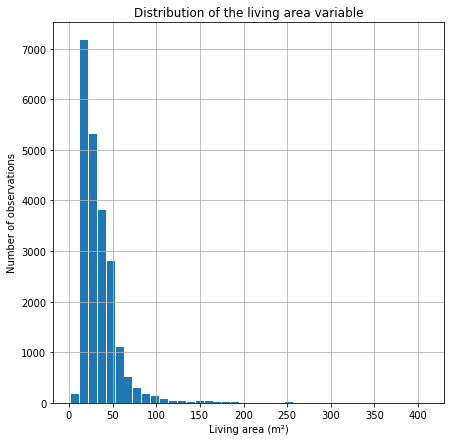

In [13]:
df['living_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Living area (m²)')
plt.ylabel('Number of observations')
plt.title('Distribution of the living area variable')
plt.show()

In [14]:
df['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

We see that there are unusually small values in the data - living areas less than 5 m². We assumed that these small flats are studios, where living area is included in the kitchen area. However, according to data there is only one studio among 4 outliers. Therefore, we decided to drop outliers from the sample.

In [15]:
small_living_area = (df
                     .query('living_area < 5')
                     .pivot_table(index='locality_name', values=['studio', 'last_price', 'living_area'], 
                                  aggfunc={'studio':['mean'], 'last_price':'median', 'living_area':'median'})
)

small_living_area.columns = ['median_price', 'median_living_area', 'is_studio']
display(small_living_area)

,median_price,median_living_area,is_studio
locality_name,,,
Санкт-Петербург,"6,350,000.00",3.00,False
посёлок Мурино,"2,330,000.00",2.00,True


There are also extremely large values of the living area variable.

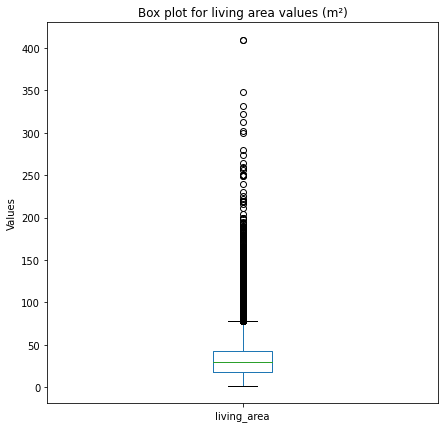

In [16]:
df.plot(y='living_area', kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for living area values (m²)')
plt.show()

In [17]:
big_living_area = (df
                     .query('living_area > 77')
                     .pivot_table(index='locality_name', values=['last_price', 'living_area'], 
                                  aggfunc={'last_price':['median', 'count'], 'living_area':'median'})
)

big_living_area.columns = ['count', 'median_price', 'median_living_area']
display(big_living_area.sort_values(by='median_living_area', ascending=False).head())

,count,median_price,median_living_area
locality_name,,,
Красное Село,1,"14,000,000.00",190.00
деревня Бор,1,"20,295,200.00",147.20
посёлок Александровская,1,"13,700,000.00",125.00
Колпино,2,"22,450,000.00",123.00
деревня Новое Девяткино,1,"14,000,000.00",120.00


Since the nature of these outliers is not clear, we could partially remove them keeping 99% of the data.

In [18]:
quantile005 = df['living_area'].quantile(0.005)
quantile995 = df['living_area'].quantile(0.995)

In [19]:
df = df.query('@quantile005 < living_area < @quantile995').copy()

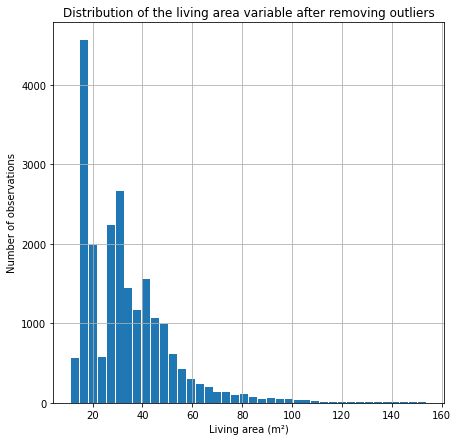

In [20]:
df['living_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Living area (m²)')
plt.ylabel('Number of observations')
plt.title('Distribution of the living area variable after removing outliers')
plt.show()

In [21]:
df['living_area'].describe()

count   21,578.00
mean        33.75
std         18.31
min         11.20
25%         18.70
50%         30.00
75%         42.10
max        154.00
Name: living_area, dtype: float64

After removing outliers the mean and median (and other descriptive statistics) did not change much. By dropping outliners we also got rid of the missing values.

In [22]:
print('Number of missing values in "living_area":', df['living_area'].isna().sum())

Number of missing values in "living_area": 0


Next, let's examine the variable `kitchen_area`.

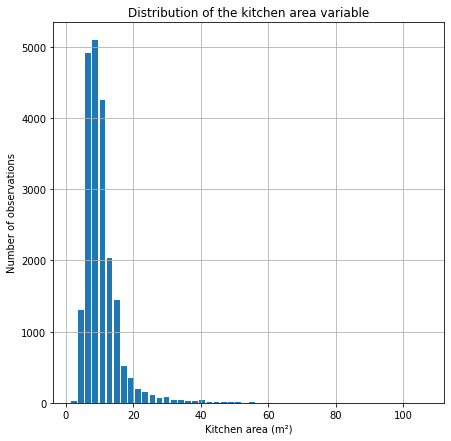

In [23]:
df['kitchen_area'].hist(bins=50, figsize=(7,7), rwidth=0.8)

plt.xlabel('Kitchen area (m²)')
plt.ylabel('Number of observations')
plt.title('Distribution of the kitchen area variable')
plt.show()

In [24]:
df['kitchen_area'].describe()

count   20,801.00
mean        10.40
std          5.55
min          1.30
25%          7.00
50%          9.00
75%         11.90
max        107.00
Name: kitchen_area, dtype: float64

It can be seen from the histogram that there are extremely small values  – kitchens less than 5 m². Let's study them.

We supposed that those flats were studios and kitchen area was included in living area. However, we can see from the data below that all of these apartments are not studios. Therefore, extremelly small kitchens seem to be outliers.

In [25]:
small_kitchen = (df
                 .query('kitchen_area < 5')
                 .pivot_table(index='locality_name', values=['last_price', 'kitchen_area', 'studio'], 
                              aggfunc={'studio':'mean', 'last_price':['median', 'count'], 'kitchen_area':'median'})
)

small_kitchen.columns = ['median_kitchen_area', 'count', 'median_price', 'is_studio']
display(small_kitchen.sort_values(by='median_price', ascending=False).head())

,median_kitchen_area,count,median_price,is_studio
locality_name,,,,
Зеленогорск,4.90,1,"3,700,000.00",False
Пушкин,4.90,3,"3,500,000.00",False
посёлок Стрельна,4.00,3,"3,400,000.00",False
Санкт-Петербург,4.00,48,"3,325,000.00",False
Кронштадт,4.80,3,"3,300,000.00",False


In [26]:
small_kitchen['is_studio'].all()

False

Next, let's look at extremely large values. It can be seen from the box plot that all values greater than 19 m² are outliers.

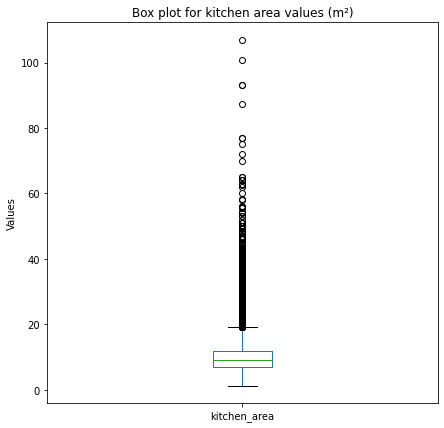

In [27]:
df.plot(y='kitchen_area', kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for kitchen area values (m²)')
plt.show()

In [28]:
big_kitchen = (df
                 .query('kitchen_area > 19')
                 .pivot_table(index='locality_name', values=['last_price', 'total_area', 'kitchen_area'], 
                              aggfunc={'last_price':['median', 'count'], 'total_area':'median', 'kitchen_area':'median'})
)

big_kitchen.columns = ['median_kitchen_area', 'count', 'median_price', 'median_total_area']
display(big_kitchen.sort_values(by='median_price', ascending=False).head())

,median_kitchen_area,count,median_price,median_total_area
locality_name,,,,
посёлок Репино,30.00,1,"28,000,000.00",160.00
посёлок Стрельна,35.00,1,"17,800,000.00",204.00
Зеленогорск,23.90,3,"17,212,500.00",76.50
Санкт-Петербург,24.40,941,"14,380,000.00",107.60
Пушкин,26.25,26,"12,995,000.00",103.95


Since we cannot explain these outliers, let's remove them and look at the resulting distribution. As at the previous stage, let's leave 99% of the data to keep its original distribution.

In [29]:
quantile005 = df['kitchen_area'].quantile(0.005)
quantile995 = df['kitchen_area'].quantile(0.995)

In [30]:
df = df.query('@quantile005 < kitchen_area < @quantile995').copy()

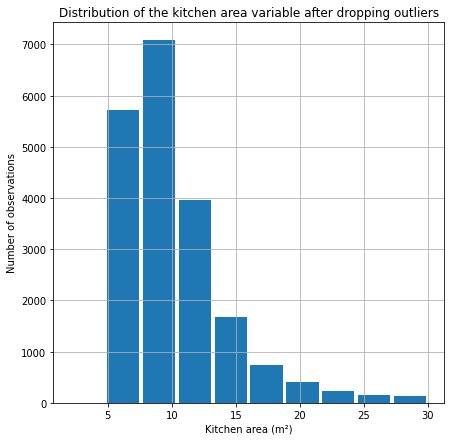

In [31]:
df['kitchen_area'].hist(range=(2,30), figsize=(7,7), rwidth=0.9)

plt.xlabel('Kitchen area (m²)')
plt.ylabel('Number of observations')
plt.title('Distribution of the kitchen area variable after dropping outliers')
plt.show()

In [32]:
df['kitchen_area'].describe()

count   20,227.00
mean        10.30
std          4.56
min          5.04
25%          7.10
50%          9.10
75%         11.95
max         39.90
Name: kitchen_area, dtype: float64

After removing outliers the mean and median (and other descriptive statistics) did not change much. By dropping outliners we also got rid of the missing values.

In [33]:
print('Number of missing values in "kitchen_area":', df['kitchen_area'].isna().sum())

Number of missing values in "kitchen_area": 0


#### `floors_total` variable

Now let's study the variable `floors_total` and fill in the missing values.

In [34]:
df['floors_total'].describe()

count   20,190.00
mean        10.67
std          6.52
min          1.00
25%          5.00
50%          9.00
75%         15.00
max         60.00
Name: floors_total, dtype: float64

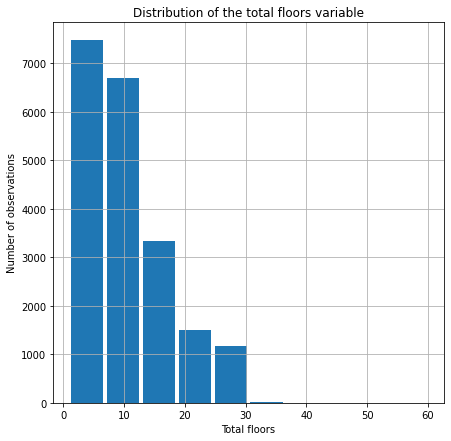

In [35]:
df['floors_total'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Total floors')
plt.ylabel('Number of observations')
plt.title('Distribution of the total floors variable')
plt.show()

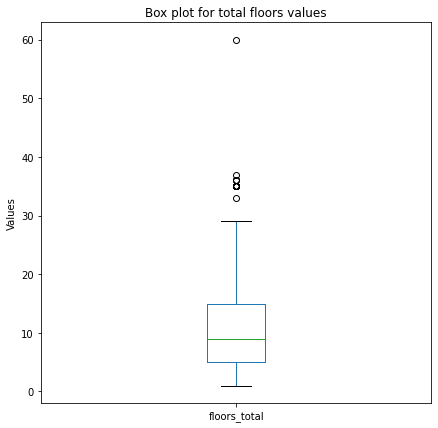

In [36]:
df['floors_total'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for total floors values')
plt.show()

In [37]:
print('Number of outliers:', df[df['floors_total'] > 30].shape[0])

Number of outliers: 28


In [38]:
high_floors = (df
               .query('floors_total > 30')
               .pivot_table(index='locality_name', values='floors_total', aggfunc=['mean', 'count'])
)

high_floors.columns = ['mean_floors', 'count']

high_floors

,mean_floors,count
locality_name,,
Кронштадт,60.00,1
Санкт-Петербург,35.11,27


Since there are outliers (26 observations), it was decided to remove them, and check the missing values with the median.

In [39]:
df = df.query('floors_total < 30').copy()

In [40]:
print('Number of missing values in "floors_total":', df['floors_total'].isna().sum())

Number of missing values in "floors_total": 0


#### `ceiling_height` variable

Next, let's study the variable `ceiling_height`. Ceilings over 10 meters are unusuall. It's most likely a mistake in the data. We can create a function to change the values that were spelled wrong.

In [41]:
def ceiling_corrector(series):
    if series > 10:
        return series * 0.1
    else:
        return series

df['ceiling_height'] = df['ceiling_height'].apply(ceiling_corrector)

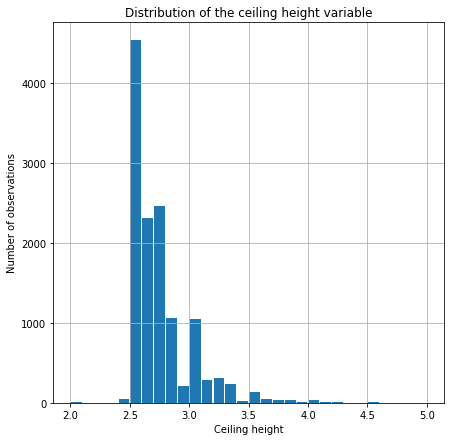

In [42]:
df.hist('ceiling_height', bins = 30, range=(2,5), figsize=(7,7), rwidth=0.9)

plt.xlabel('Ceiling height')
plt.ylabel('Number of observations')
plt.title('Distribution of the ceiling height variable')
plt.show()

In [43]:
df['ceiling_height'].describe()

count   12,849.00
mean         2.72
std          0.29
min          1.00
25%          2.52
50%          2.65
75%          2.80
max         10.00
Name: ceiling_height, dtype: float64

Now we can fill in the missing values.

To eliminate the influence of outliers we can fill in the gaps with group median values. Since the ceiling height depends on the type of housing we can group data and use medians for studios, apartments or something else.

In [44]:
df['ceiling_height'] = \
df['ceiling_height'].fillna(df.groupby(['studio', 'is_apartment'])['ceiling_height'].transform('median'))

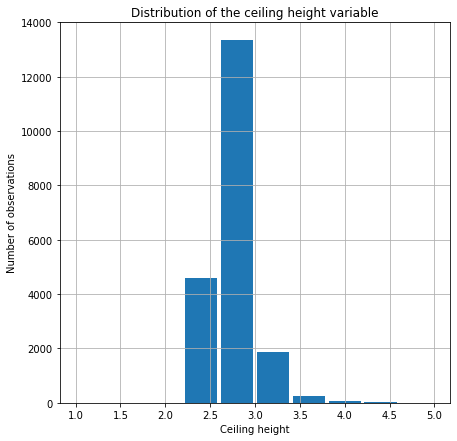

In [45]:
df.hist('ceiling_height', range=(1,5), figsize=(7,7), rwidth=0.9)

plt.xlabel('Ceiling height')
plt.ylabel('Number of observations')
plt.title('Distribution of the ceiling height variable')
plt.show()

In [46]:
df['ceiling_height'].describe()

count   20,162.00
mean         2.70
std          0.23
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

In [47]:
print('Number of missing values in "ceiling_height":', df['ceiling_height'].isna().sum())

Number of missing values in "ceiling_height": 0


Both the distribution and the descriptive statistics did not change. We successfully managed to fill in missing values.

#### Data categorization

We suppose that missing values in the `airports_nearest` (distance to the nearest airport in meters), `cityCenters_nearest` (distance to the city center), `parks_around3000` (number of parks within a 3 km), and `parks_nearest` (distance to the nearest park), `ponds_around3000` (number of ponds within a 3 km) and ` ponds_nearest` (distance to the nearest pond) depend on the type of location: city, village, etc.

In [48]:
def local(series):
    if 'городск' in series:
        return 'urban-type settlement'
    elif ('поселок' in series) or ('посёлок' in series):
        return 'small countryside'
    elif 'село' in series:
        return 'big countryside'
    elif 'товарищество' in series:
        return 'garden partnership'
    elif 'деревня' in series:
        return 'village'
    elif 'unknown' in series:
        return 'unknown'
    else:
        return 'city'
    
df['locality_type'] = df['locality_name'].apply(local)

In [49]:
df['locality_type'].value_counts()

city                     17132
small countryside         1729
village                    778
urban-type settlement      456
unknown                     37
big countryside             25
garden partnership           5
Name: locality_type, dtype: int64

#### `airports_nearest`, `cityCenters_nearest` variables

Let's study `airports_nearest` variable.

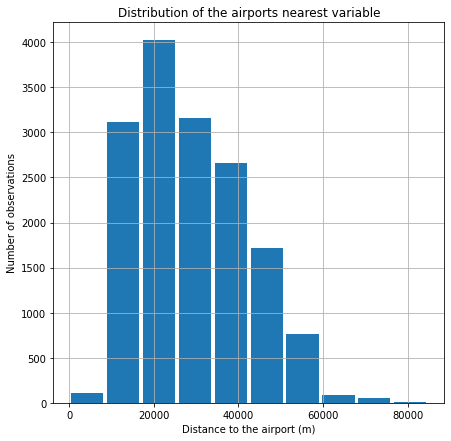

In [50]:
df['airports_nearest'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the airport (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of the airports nearest variable')
plt.show()

In [51]:
df['airports_nearest'].describe()

count   15,679.00
mean    28,838.37
std     12,637.33
min          0.00
25%     18,509.50
50%     26,815.00
75%     37,291.00
max     84,869.00
Name: airports_nearest, dtype: float64

We can see from the histogram outliers – flats that are 0 meters away from airports. Let's drop it.

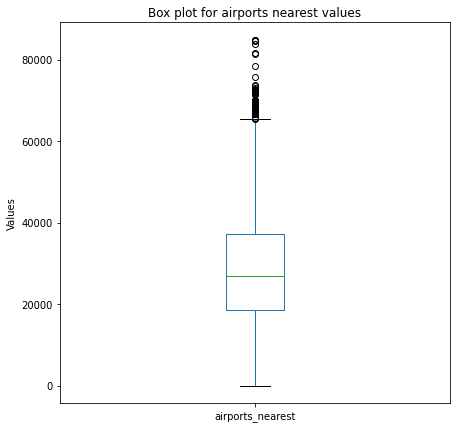

In [52]:
df['airports_nearest'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for airports nearest values')
plt.show()

According to the box plot there are outliers in the data. However, if we look at the data closely we see nothing unusual: from first location to the nearest airport (Pulkovo Airport) is indeed 84 km.

In [53]:
airport = (df
              .query('airports_nearest > 60000')
              .pivot_table(index='locality_name', values='airports_nearest')
)

display(airport.sort_values(by='airports_nearest', ascending=False))

,airports_nearest
locality_name,
посёлок Молодёжное,"84,536.25"
Зеленогорск,"73,342.32"
Кронштадт,"67,371.83"
посёлок Репино,"61,797.50"
посёлок Парголово,"61,630.54"
Сестрорецк,"61,177.42"


In addition, if drop 1% of these outliers, we will lose ~5 thousand observations, including all villages, garden partnerships and other types of locations. So let's keep it.

In [54]:
print('Number of observations:', df.shape[0])

Number of observations: 20162


In [55]:
quantile99 = df['airports_nearest'].quantile(0.99)
print('Number of observations after dropping 1% of outliers:', \
      df.query('0 < airports_nearest < @quantile99').shape[0])

Number of observations after dropping 1% of outliers: 15521


For example, there are no villages left if we remove 1% of the outliers.

In [56]:
#df.query('0 < airports_nearest < @quantile99')[df['locality_type'] == 'village']

In [57]:
print('Number of observations grouped by locations')
display(df['locality_type'].value_counts())

Number of observations grouped by locations


city                     17132
small countryside         1729
village                    778
urban-type settlement      456
unknown                     37
big countryside             25
garden partnership           5
Name: locality_type, dtype: int64

We cannot fill in missing values for villages, urban-type settlements, big countryside, garden partnership using group median since in these groups there is no observations at all. However, we can do it for cities and big countrysides.

In [58]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'airports_nearest'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'airports_nearest'].isna().sum())

print('Number of missing values in "big countryside":', df.loc[df['locality_type'] == 'big countryside', 'airports_nearest'].isna().sum())

print('Number of missing values in "garden partnership":', \
      df.loc[df['locality_type'] == 'garden partnership', 'airports_nearest'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countryside": 25
Number of missing values in "garden partnership": 5


There is no missing values for cities and 935 NAs for small countrysides.

In [59]:
print('Number of missing values in "cities":', \
      df.loc[df['locality_type'] == 'citiy', 'airports_nearest'].isna().sum())

print('Number of missing values in "small countrysides":', \
      df.loc[df['locality_type'] == 'small countryside', 'airports_nearest'].isna().sum())

Number of missing values in "cities": 0
Number of missing values in "small countrysides": 935


In [60]:
small_countrysides_median = df.loc[df['locality_type'].isin(['small countryside']), 'airports_nearest'].median()

df.loc[df['locality_type'].isin(['small countryside']), 'airports_nearest'] = \
df.loc[df['locality_type'].isin(['small countryside']), 'airports_nearest'].fillna(small_countrysides_median)

In [61]:
df['airports_nearest'].describe()

count   16,614.00
mean    28,644.44
std     12,302.22
min          0.00
25%     18,904.00
50%     25,760.50
75%     36,691.00
max     84,869.00
Name: airports_nearest, dtype: float64

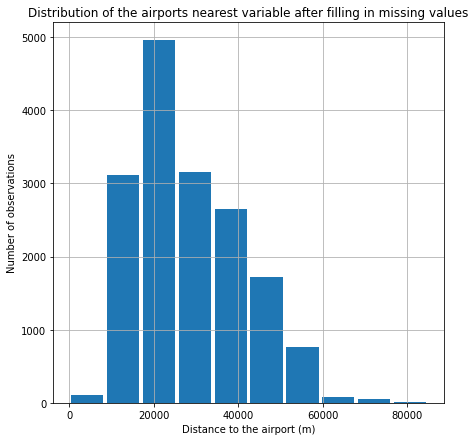

In [62]:
df['airports_nearest'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the airport (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of the airports nearest variable after filling in missing values')
plt.show()

Next, examine the `cityCenters_nearest` variable. As we can see from histogram, there are outliers on both the left and right sides of the distribution.

In [63]:
df['cityCenters_nearest'].describe()

count   15,697.00
mean    14,202.07
std      8,516.83
min        181.00
25%      9,439.00
50%     13,123.00
75%     16,209.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

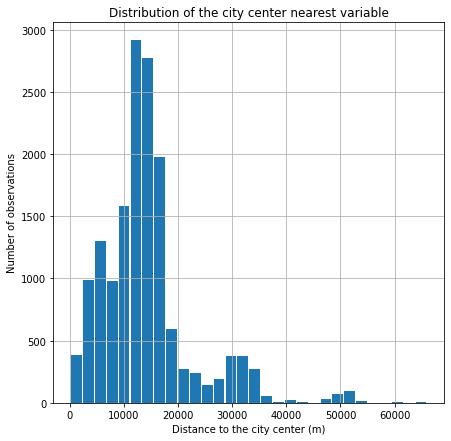

In [64]:
df['cityCenters_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the city center (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of the city center nearest variable')
plt.show()

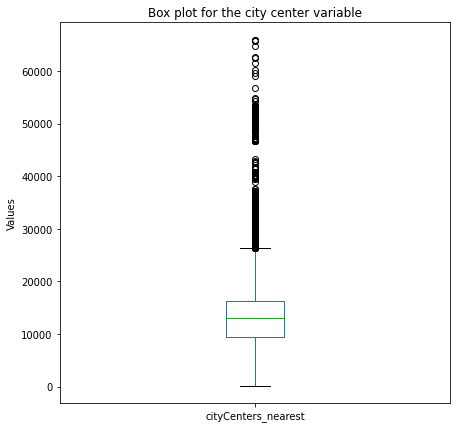

In [65]:
df['cityCenters_nearest'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for the city center variable')
plt.show()

If drop 1% of these outliers, we will lose ~5 thousand observations, including all villages, garden partnerships and other types of locations. So let's keep it.

In [66]:
print('Number of observations:', df.shape[0])

Number of observations: 20162


In [67]:
quantile99 = df['cityCenters_nearest'].quantile(0.99)
print('Number of observations after dropping 1% of outliers', df.query('cityCenters_nearest < @quantile99').shape[0])

Number of observations after dropping 1% of outliers 15540


Let's fill the NAs in the variable `cityCenters_nearest`. In group of villages, urban-type settlements and etc there is observations to use for fillin in missing values. We keep them in data set.

In [68]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'cityCenters_nearest'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'cityCenters_nearest'].isna().sum())

print('Number of missing values in "big countrysides":', df.loc[df['locality_type'] == 'big countryside', 'cityCenters_nearest'].isna().sum())

print('Number of missing values in "garden partnerships":', \
      df.loc[df['locality_type'] == 'garden partnership', 'cityCenters_nearest'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countrysides": 25
Number of missing values in "garden partnerships": 5


Let's use group median for cities an small countrysides to get rid of the missing values.

In [69]:
print('Number of missing values in "small countrysides":', df.loc[df['locality_type'] == 'small countryside', 'cityCenters_nearest'].isna().sum())

print('Number of missing values in "cities":', \
      df.loc[df['locality_type'] == 'city', 'cityCenters_nearest'].isna().sum())

Number of missing values in "small countrysides": 935
Number of missing values in "cities": 2260


In [70]:
city_median = df.loc[df['locality_type'].isin(['city']), 'cityCenters_nearest'].median()

df.loc[df['locality_type'].isin(['city']), 'cityCenters_nearest'] = \
df.loc[df['locality_type'].isin(['city']), 'cityCenters_nearest'].fillna(city_median)

In [71]:
small_countryside_median = df.loc[df['locality_type'].isin(['small countryside']), 'cityCenters_nearest'].median()

df.loc[df['locality_type'].isin(['small countryside']), 'cityCenters_nearest'] = \
df.loc[df['locality_type'].isin(['small ountryside']), 'cityCenters_nearest'].fillna(small_countryside_median)

In [72]:
df['cityCenters_nearest'].describe()

count   17,163.00
mean    13,587.39
std      7,784.67
min        181.00
25%     10,038.50
50%     12,812.50
75%     15,228.00
max     62,706.00
Name: cityCenters_nearest, dtype: float64

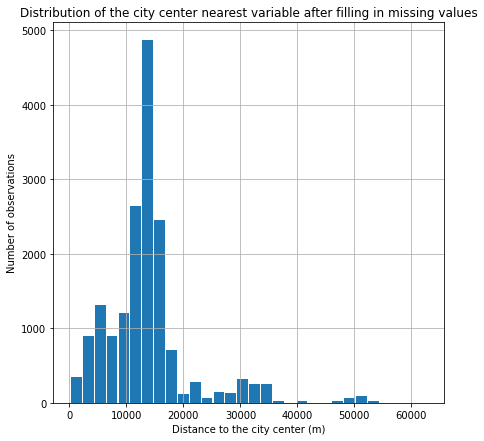

In [73]:
df['cityCenters_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the city center (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of the city center nearest variable after filling in missing values')
plt.show()

#### `parks_nearest`, `parks_around3000` variables

There are no outliers in `parks_around3000` variable.

In [74]:
df['parks_around3000'].describe()

count   15,698.00
mean         0.61
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: float64

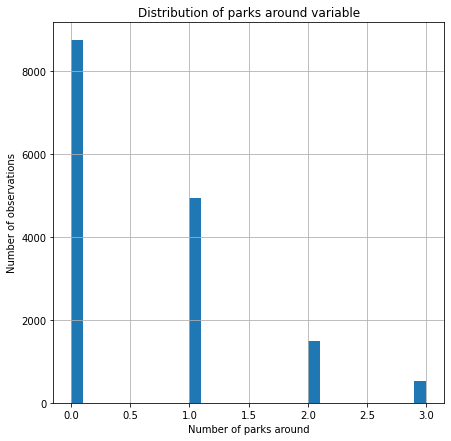

In [75]:
df['parks_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Number of parks around')
plt.ylabel('Number of observations')
plt.title('Distribution of parks around variable')
plt.show()

There is no observations in group of villages, urban-type settlements  and etc. Thus, we cannot use group median to fill in missing values. We keep them in data set.

In [76]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'parks_around3000'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'parks_around3000'].isna().sum())

print('Number of missing values in "big countrysides":', df.loc[df['locality_type'] == 'big countryside', 'parks_around3000'].isna().sum())

print('Number of missing values in "garden partnerships":', \
      df.loc[df['locality_type'] == 'garden partnership', 'parks_around3000'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countrysides": 25
Number of missing values in "garden partnerships": 5


Let's fill missing values in the `parks_around 3000` variable for cities and small countrysides with the group median.

In [77]:
print('Number of missing values in "cities":', df.loc[df['locality_type'] == 'city', 'parks_around3000'].isna().sum())

print('Number of missing values in "small countrysides":', \
      df.loc[df['locality_type'] == 'small countryside', 'parks_around3000'].isna().sum())

Number of missing values in "cities": 2259
Number of missing values in "small countrysides": 935


In [78]:
city_median = df.loc[df['locality_type'].isin(['city']), 'parks_around3000'].median()

df.loc[df['locality_type'].isin(['city']), 'parks_around3000'] = \
df.loc[df['locality_type'].isin(['city']), 'parks_around3000'].fillna(city_median)

In [79]:
small_countryside_median = df.loc[df['locality_type'].isin(['small countryside']), 'parks_around3000'].mean()

df.loc[df['locality_type'].isin(['small countryside']), 'parks_around3000'] = \
df.loc[df['locality_type'].isin(['small countryside']), 'parks_around3000'].fillna(small_countryside_median)

In [80]:
df['parks_around3000'].describe()

count   18,892.00
mean         0.51
std          0.76
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: float64

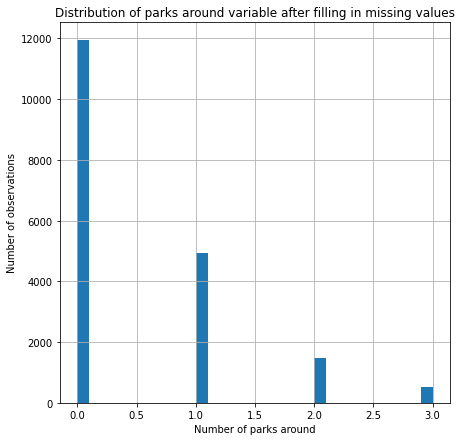

In [81]:
df['parks_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Number of parks around')
plt.ylabel('Number of observations')
plt.title('Distribution of parks around variable after filling in missing values')
plt.show()

Let's study `parks_nearest` variable. There are 13203 missing values. We suppose the reason for absence of data is the absence of parks near particular locations. We cannot drop 13 thousands observations, let's try to fill in missing values. 

In [82]:
print('Number of missing values for "parks_nearest":', df['parks_nearest'].isna().sum())

Number of missing values for "parks_nearest": 13203


In [83]:
df['parks_nearest'].describe()

count   6,959.00
mean      489.42
std       338.30
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

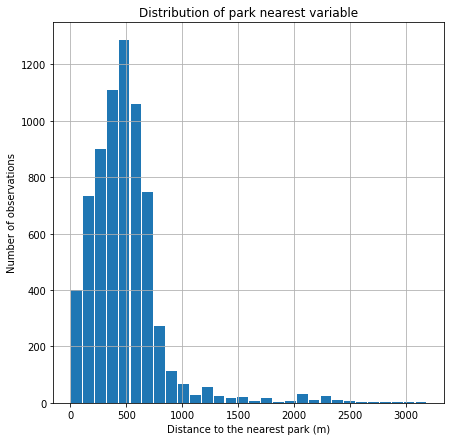

In [84]:
df['parks_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the nearest park (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of park nearest variable')
plt.show()

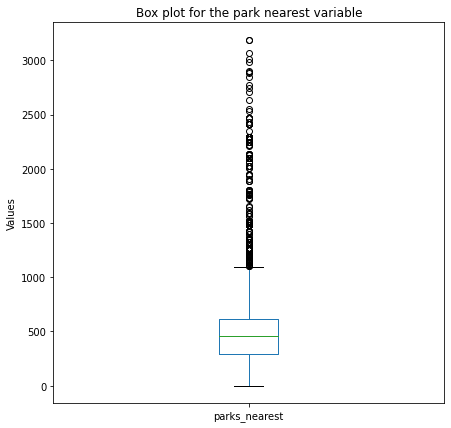

In [85]:
df['parks_nearest'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for the park nearest variable')
plt.show()

If we drop 1% of outliers, we will lose about 14 thousand observations. Let's keep them.

In [86]:
print('Number of observations:', df.shape[0])

Number of observations: 20162


In [87]:
quantile99 = df['parks_nearest'].quantile(0.99)
print('Number of observations after dropping 1% of outliers:', df.query('parks_nearest < @quantile99').shape[0])

Number of observations after dropping 1% of outliers: 6870


There is no observations for villages, urban-type settlements  and etc (see below). Thus, we cannot use group median to fill in missing values. Let's keep them in data set.

In [88]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'parks_nearest'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'parks_nearest'].isna().sum())

print('Number of missing values in "big countrysides":', df.loc[df['locality_type'] == 'big countryside', 'parks_nearest'].isna().sum())

print('Number of missing values in "garden partnerships":', \
      df.loc[df['locality_type'] == 'garden partnership', 'parks_nearest'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countrysides": 25
Number of missing values in "garden partnerships": 5


Let's try to get rid of the missing values in cities and small countrysides variable by replacing NAs with the group median value.

In [89]:
print('Number of missing values in "cities":', \
      df.loc[df['locality_type'] == 'city', 'parks_nearest'].isna().sum())

print('Number of missing values in "small countrysides":', \
      df.loc[df['locality_type'] == 'small countryside', 'parks_nearest'].isna().sum())

Number of missing values in "cities": 10213
Number of missing values in "small countrysides": 1702


In [90]:
# let's create a copy of the dataframe and use it for test

df_test = df.copy()

city_median = df_test.loc[df['locality_type'].isin(['city']), 'parks_nearest'].median()

df_test.loc[df_test['locality_type'].isin(['city']), 'parks_nearest'] = \
df_test.loc[df['locality_type'].isin(['city']), 'parks_nearest'].fillna(city_median)

In [91]:
small_countryside_median = df_test.loc[df['locality_type'].isin(['small countryside']), 'parks_nearest'].median()

df_test.loc[df['locality_type'].isin(['small countryside']), 'parks_nearest'] = \
df_test.loc[df['locality_type'].isin(['small countryside']), 'parks_nearest'].fillna(small_countryside_median)

Since there are ~14 thousand missing values, replacing them with the mean or median will change original distribution.

In [92]:
df_test['parks_nearest'].describe()

count   18,874.00
mean       489.78
std        216.41
min          1.00
25%        455.00
50%        455.00
75%        492.00
max      3,190.00
Name: parks_nearest, dtype: float64

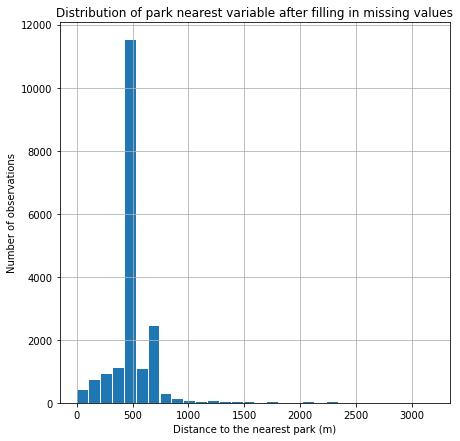

In [93]:
df_test['parks_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the nearest park (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of park nearest variable after filling in missing values')
plt.show()

Therefore, we will keep all missing values in datafarme and will not fill in it with median.

#### `ponds_around3000` and `ponds_nearest` variables

Regarding `ponds_around3000` and `ponds_nearest` variables, we will use the same strategy for data preprocessing as for `parks_around3000` and `parks_nearest` since the problems that we observe are the same.

In [94]:
df['ponds_around3000'].describe()

count   15,698.00
mean         0.75
std          0.93
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: float64

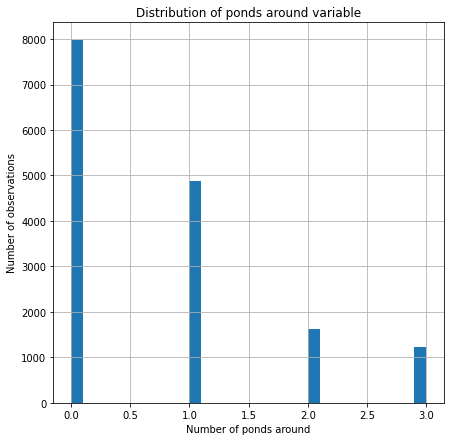

In [95]:
df['ponds_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Number of ponds around')
plt.ylabel('Number of observations')
plt.title('Distribution of ponds around variable')
plt.show()

In [96]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'ponds_around3000'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'ponds_around3000'].isna().sum())

print('Number of missing values in "big countrysides":', df.loc[df['locality_type'] == 'big countryside', 'ponds_around3000'].isna().sum())

print('Number of missing values in "garden partnerships":', \
      df.loc[df['locality_type'] == 'garden partnership', 'ponds_around3000'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countrysides": 25
Number of missing values in "garden partnerships": 5


In [97]:
print('Number of missing values in "cities":', df.loc[df['locality_type'] == 'city', 'ponds_around3000'].isna().sum())

print('Number of missing values in "small countrysides":', \
      df.loc[df['locality_type'] == 'small countryside', 'ponds_around3000'].isna().sum())

Number of missing values in "cities": 2259
Number of missing values in "small countrysides": 935


In [98]:
city_median = df.loc[df['locality_type'].isin(['city']), 'ponds_around3000'].median()

df.loc[df['locality_type'].isin(['city']), 'ponds_around3000'] = \
df.loc[df['locality_type'].isin(['city']), 'ponds_around3000'].fillna(city_median)

In [99]:
small_countryside_median = df.loc[df['locality_type'].isin(['small countryside']), 'ponds_around3000'].median()

df.loc[df['locality_type'].isin(['small countryside']), 'ponds_around3000'] = \
df.loc[df['locality_type'].isin(['small countryside']), 'ponds_around3000'].fillna(small_countryside_median)

In [100]:
df['ponds_around3000'].describe()

count   18,892.00
mean         0.74
std          0.87
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: float64

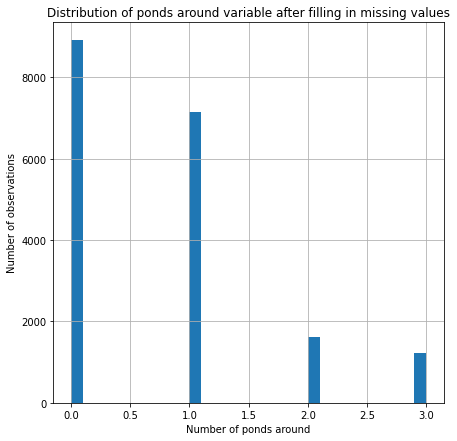

In [101]:
df['ponds_around3000'].hist(bins=30, figsize=(7,7))

plt.xlabel('Number of ponds around')
plt.ylabel('Number of observations')
plt.title('Distribution of ponds around variable after filling in missing values')
plt.show()

Finally, let's study `ponds_nearest` variable.

In [102]:
print('Number of missing values in "ponds_nearest":', df['ponds_nearest'].isna().sum())

Number of missing values in "ponds_nearest": 12434


As we can see from histogram there is no outliers in the data.

In [103]:
df['ponds_nearest'].describe()

count   7,728.00
mean      522.15
std       276.12
min        13.00
25%       301.00
50%       506.00
75%       733.00
max     1,344.00
Name: ponds_nearest, dtype: float64

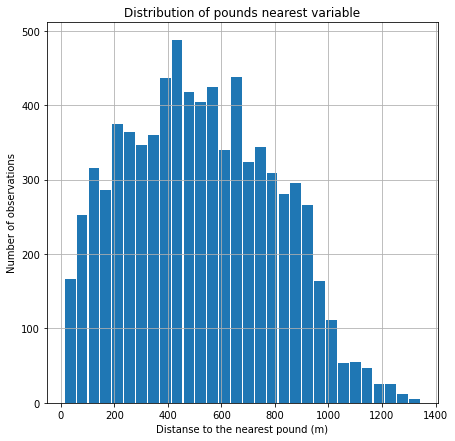

In [104]:
df['ponds_nearest'].hist(bins=30, figsize=(7,7), rwidth=0.9)

plt.xlabel('Distanse to the nearest pound (m)')
plt.ylabel('Number of observations')
plt.title('Distribution of pounds nearest variable')
plt.show()

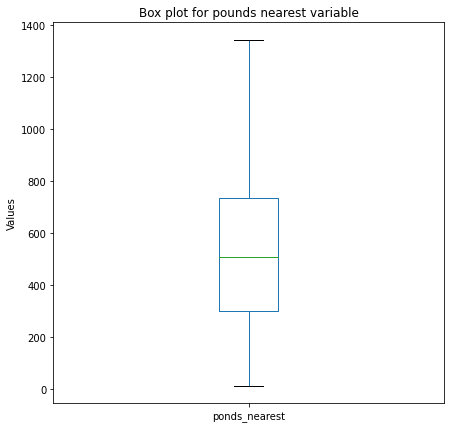

In [105]:
df['ponds_nearest'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for pounds nearest variable')
plt.show()

In [106]:
df['locality_type'].value_counts()

city                     17132
small countryside         1729
village                    778
urban-type settlement      456
unknown                     37
big countryside             25
garden partnership           5
Name: locality_type, dtype: int64

In [107]:
print('Number of missing values in "villages":', df.loc[df['locality_type'] == 'village', 'ponds_nearest'].isna().sum())

print('Number of missing values in "urban-type settlements":', \
      df.loc[df['locality_type'] == 'urban-type settlement', 'ponds_nearest'].isna().sum())

print('Number of missing values in "big countrysides":', df.loc[df['locality_type'] == 'big countryside', 'ponds_nearest'].isna().sum())

print('Number of missing values in "garden partnerships":', \
      df.loc[df['locality_type'] == 'garden partnership', 'ponds_nearest'].isna().sum())

Number of missing values in "villages": 778
Number of missing values in "urban-type settlements": 456
Number of missing values in "big countrysides": 25
Number of missing values in "garden partnerships": 5


In [108]:
print('Number of missing values in "cities":', \
      df.loc[df['locality_type'] == 'city', 'ponds_nearest'].isna().sum())

print('Number of missing values in "small countrysides":', \
      df.loc[df['locality_type'] == 'small countryside', 'ponds_nearest'].isna().sum())

Number of missing values in "cities": 9638
Number of missing values in "small countrysides": 1515


Let's see how distribution of `ponds_nearest` will change if we replace NAs with group median value.

In [109]:
df_test2 = df.copy()

city_median = df_test2.loc[df_test2['locality_type'].isin(['city']), 'ponds_nearest'].median()

df_test2.loc[df_test2['locality_type'].isin(['город']), 'ponds_nearest'] = \
df_test2.loc[df['locality_type'].isin(['город']), 'ponds_nearest'].fillna(city_median)

In [110]:
small_countryside_median = df_test2.loc[df_test2['locality_type'].isin(['small countryside']), 'ponds_nearest'].median()

df_test2.loc[df['locality_type'].isin(['small countryside']), 'ponds_nearest'] = \
df_test2.loc[df['locality_type'].isin(['small countryside']), 'ponds_nearest'].fillna(small_countryside_median)

In [111]:
df_test2['ponds_nearest'].describe()

count   9,243.00
mean      533.84
std       253.85
min        13.00
25%       350.00
50%       587.00
75%       680.00
max     1,344.00
Name: ponds_nearest, dtype: float64

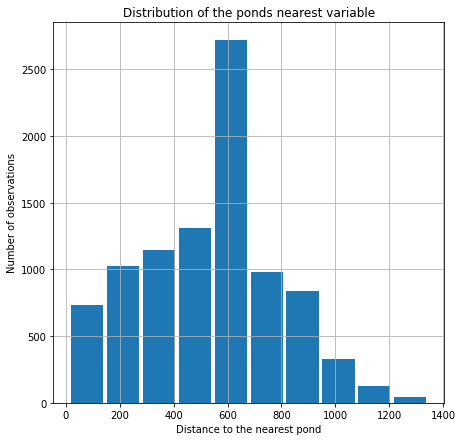

In [112]:
df_test2['ponds_nearest'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Distance to the nearest pond')
plt.ylabel('Number of observations')
plt.title('Distribution of the ponds nearest variable')
plt.show()

It can be seen from the graph that distribution has changed. Therefore, we will not fill in missing values and keep NAs in data.

#### `days_exposition` variable

We suppose that the missing value means that this is new ad since `days_exposition` variable show how many days the ad was availiable (from publication to removal). Let's keep it on dataframe.

In [113]:
df['days_exposition'].describe()

count   17,411.00
mean       184.74
std        220.84
min          1.00
25%         45.00
50%        101.00
75%        238.50
max      1,580.00
Name: days_exposition, dtype: float64

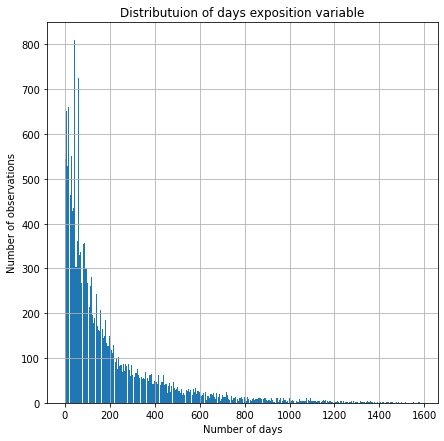

In [114]:
df['days_exposition'].hist(figsize=(7,7), rwidth=0.9, bins=300)

plt.xlabel('Number of days')
plt.ylabel('Number of observations')
plt.title('Distributuion of days exposition variable')
plt.show()

In [115]:
# приводим в порядок индексы после удаления переменных

df = df.reset_index(drop=True)
df.shape[0]

20162

In [116]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         3548
cityCenters_nearest      2999
parks_around3000         1270
parks_nearest           13203
ponds_around3000         1270
ponds_nearest           12434
days_exposition          2751
locality_name2              0
locality_type               0
dtype: int64

**Summary:** We studied variables `living_area`, `kitchen_area`, `floors_total`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` and `days_exposition` and found outliers. After the outliers were dropped, we filled the missing values in almost all variables where they were. The median was most commonly used to fill in the NAs.

### Data types

In [117]:
df['first_day_exposition'] = \
pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [118]:
col_names = ['floors_total', 'balcony', 'is_apartment', 'studio', 'open_plan', 'last_price']

for cols in col_names:
    df[cols] = df[cols].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20162 entries, 0 to 20161
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20162 non-null  int64         
 1   last_price            20162 non-null  int64         
 2   total_area            20162 non-null  float64       
 3   first_day_exposition  20162 non-null  datetime64[ns]
 4   rooms                 20162 non-null  int64         
 5   ceiling_height        20162 non-null  float64       
 6   floors_total          20162 non-null  int64         
 7   living_area           20162 non-null  float64       
 8   floor                 20162 non-null  int64         
 9   is_apartment          20162 non-null  int64         
 10  studio                20162 non-null  int64         
 11  open_plan             20162 non-null  int64         
 12  kitchen_area          20162 non-null  float64       
 13  balcony         

### Ouliers preprocessing

Let's study `total_images` variable.

In [119]:
df['total_images'].describe()

count   20,162.00
mean        10.09
std          5.67
min          0.00
25%          6.00
50%         10.00
75%         14.00
max         50.00
Name: total_images, dtype: float64

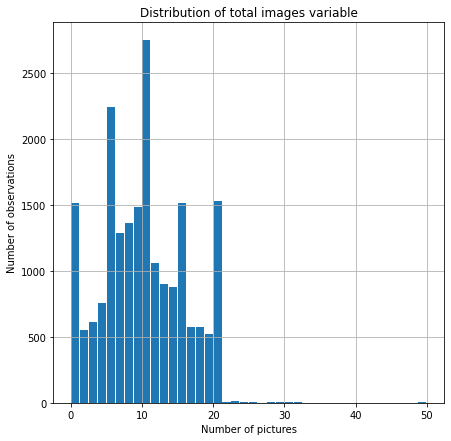

In [120]:
df['total_images'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Number of pictures')
plt.ylabel('Number of observations')
plt.title('Distribution of total images variable')
plt.show()

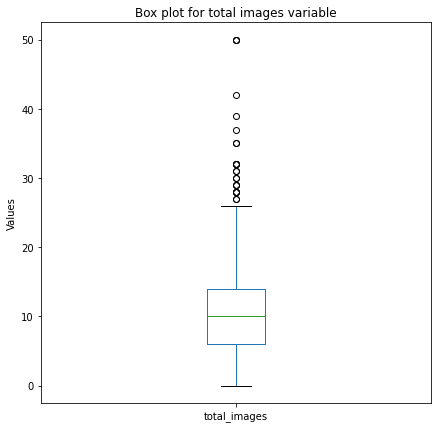

In [121]:
df['total_images'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for total images variable')
plt.show()

Let's drop 1 % of outliers.

In [122]:
df = df.query('total_images < @quantile99').copy()

In [123]:
df['total_images'].describe()

count   20,162.00
mean        10.09
std          5.67
min          0.00
25%          6.00
50%         10.00
75%         14.00
max         50.00
Name: total_images, dtype: float64

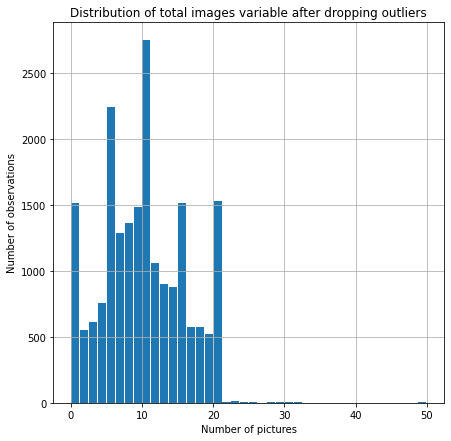

In [124]:
df['total_images'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Number of pictures')
plt.ylabel('Number of observations')
plt.title('Distribution of total images variable after dropping outliers')
plt.show()

Let's look at the `last_price` variable. Based on the descriptive statistics and the histogram, we can conclude that there are outliers in the data. The scatterplot shows that apartments over 11 million rubls are rare.

In [125]:
df['last_price'].describe()

count        20,162.00
mean      6,128,398.31
std       6,251,455.16
min         430,000.00
25%       3,500,000.00
50%       4,700,000.00
75%       6,750,000.00
max     289,238,400.00
Name: last_price, dtype: float64

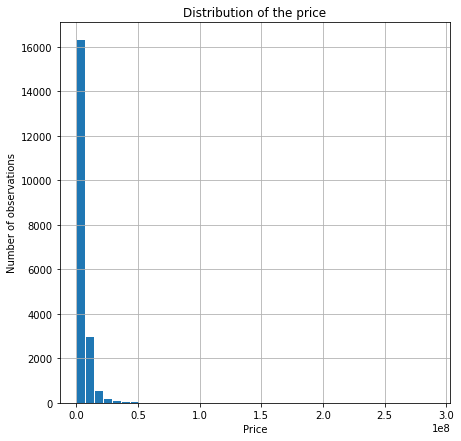

In [126]:
df['last_price'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Price')
plt.ylabel('Number of observations')
plt.title('Distribution of the price')
plt.show()

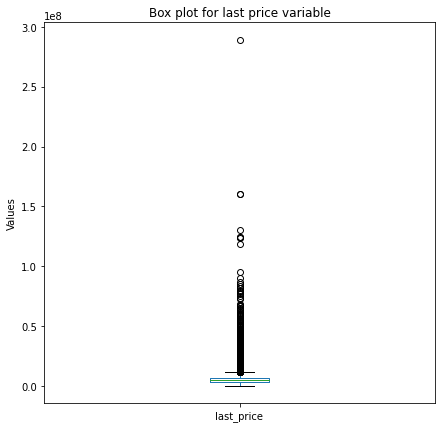

In [127]:
df['last_price'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for last price variable')
plt.show()

These values are close to the real: large area, most of these apartments are located in St. Petersburg.

In [128]:
expensive_flats = (df
                   .query('last_price > 10000000')
                   .pivot_table(index='locality_name', values=['total_area', 'last_price'], 
                                aggfunc={'total_area':['mean', 'count'],'last_price': 'median'})
)

expensive_flats.columns = ['median_price', 'count', 'area_mean']
expensive_flats.sort_values(by='count', ascending=False, inplace=True)

display(expensive_flats)

,median_price,count,area_mean
locality_name,,,
Санкт-Петербург,13850000,2062,112.10
Пушкин,14200000,30,121.17
Сестрорецк,13333000,13,100.67
Петергоф,12000000,7,135.77
unknown,14770000,6,109.33
Павловск,11150000,4,113.28
Всеволожск,10945000,4,80.91
посёлок Шушары,10700000,3,120.13
посёлок Стрельна,15500000,3,175.73


The high price of apartments located in villages are unusual. There is not enough information to verify data. Let's remove 1% of the outliers.

In [129]:
quantile99 = df['last_price'].quantile(0.99)
print('Number of observations after dropping 1% of outliers:', df.query('last_price < @quantile99').shape[0])

Number of observations after dropping 1% of outliers: 19960


In [130]:
df = df.query('last_price < @quantile99').copy()

In [131]:
df['last_price'].describe()

count       19,960.00
mean     5,709,193.00
std      3,728,976.51
min        430,000.00
25%      3,500,000.00
50%      4,690,000.00
75%      6,680,000.00
max     28,570,000.00
Name: last_price, dtype: float64

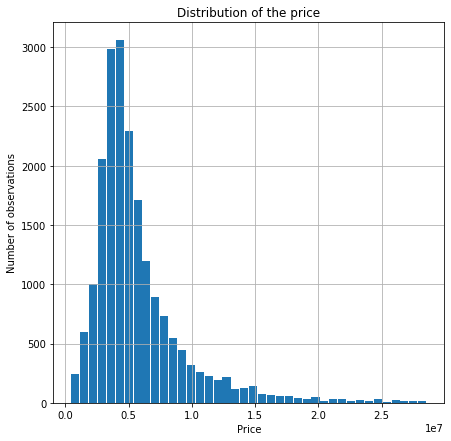

In [132]:
df['last_price'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Price')
plt.ylabel('Number of observations')
plt.title('Distribution of the price')
plt.show()

Now let's study `total_area` variable.

In [133]:
df['total_area'].describe()

count   19,960.00
mean        58.23
std         25.57
min         20.00
25%         40.50
50%         52.00
75%         69.00
max        336.00
Name: total_area, dtype: float64

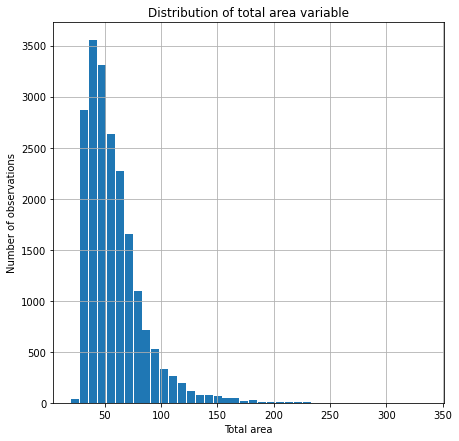

In [134]:
df['total_area'].hist(bins=40, figsize=(7,7), rwidth=0.9)

plt.xlabel('Total area')
plt.ylabel('Number of observations')
plt.title('Distribution of total area variable')
plt.show()

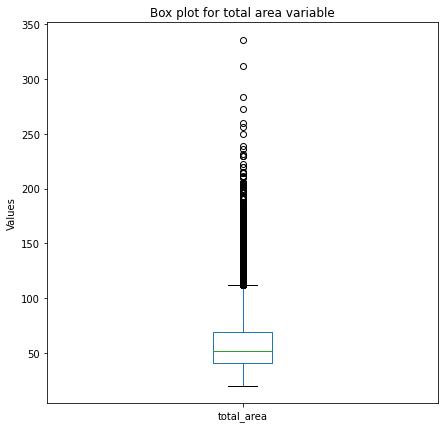

In [135]:
df['total_area'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for total area variable')
plt.show()

From the pivot table it can be seen that Peter is again the top-1. Also, there are many urban-type settlements at the top. Perhaps, it is a private sector with large territory. Let's keep all values in dataframe.

In [136]:
big_flats = (df
             .query('total_area > 100')
             .pivot_table(index='locality_name', values=['total_area', 'last_price', 'rooms'], 
                          aggfunc={'total_area':['mean', 'count'],'last_price': 'median', 'rooms':'mean'})
)

big_flats.columns = ['median_price', 'rooms_mean', 'count', 'area_mean']
big_flats.sort_values(by='count', ascending=False, inplace=True)

display(big_flats.head())

,median_price,rooms_mean,count,area_mean
locality_name,,,,
Санкт-Петербург,14000000,3.86,1087,128.99
Пушкин,15641000,3.35,20,137.89
Выборг,7200000,3.54,13,128.69
Сестрорецк,8700000,3.08,13,119.62
посёлок Шушары,7515000,4.00,8,112.74


Now thel's look at `rooms` variable (number of rooms). There are no outliers.

In [137]:
df['rooms'].describe()

count   19,960.00
mean         2.06
std          0.98
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

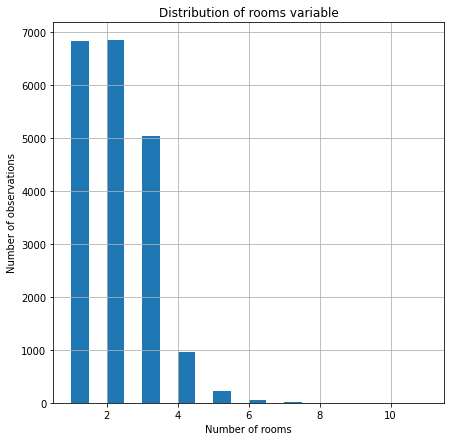

In [138]:
df['rooms'].hist(bins=20, figsize=(7,7))

plt.xlabel('Number of rooms')
plt.ylabel('Number of observations')
plt.title('Distribution of rooms variable')
plt.show()

Let's study `floor` variable.

In [139]:
df['floor'].describe()

count   19,960.00
mean         5.87
std          4.81
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

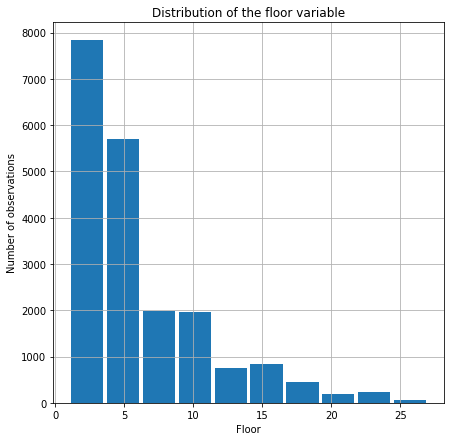

In [140]:
df['floor'].hist(figsize=(7,7), rwidth=0.9)

plt.xlabel('Floor')
plt.ylabel('Number of observations')
plt.title('Distribution of the floor variable')
plt.show()

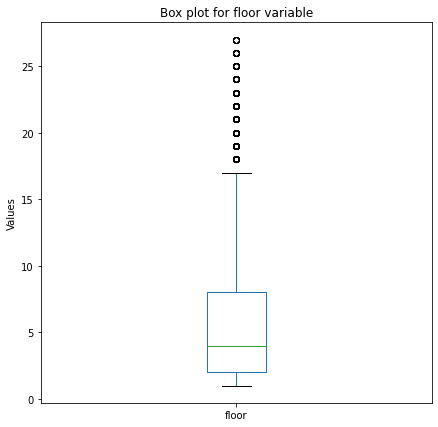

In [141]:
df['floor'].plot(kind='box', figsize=(7,7))

plt.ylabel('Values')
plt.title('Box plot for floor variable')
plt.show()

Some floors are marked as outliers. However, there is nothing unusuall in the data. According to the pivot table, the floor numbers are common for a standard building. Let's keep observations in data frame.

In [142]:
high_floor = (df[df['floor'] > 15]
              .pivot_table(index='locality_name', values='floors_total')
)

high_floor.columns = ['floors_total_mean']
display(high_floor.sort_values(by='floors_total_mean', ascending=False).head())

,floors_total_mean
locality_name,
посёлок Парголово,25.67
поселок городского типа Дубровка,25.00
Колпино,24.00
посёлок Мурино,23.67
unknown,23.67


In [143]:
df = df.reset_index(drop=True)

In [144]:
print('Total number of observations:', df.shape[0])

Total number of observations: 19960


**Summary:** We dropped remaining outliers from the data. As a result, we have 19760 observations.

### New variables

Let's find price per meter squared.

In [145]:
df['one_metre_price'] = df['last_price']/df['total_area']
display(df[['last_price', 'total_area', 'one_metre_price']].head())

,last_price,total_area,one_metre_price
0,13000000,108.00,"120,370.37"
1,3350000,40.40,"82,920.79"
2,5196000,56.00,"92,785.71"
3,2890000,30.40,"95,065.79"
4,2900000,33.16,"87,454.76"


Let's get "week day", "month" and "year" of publication from `day_of_exposition` variable.

In [146]:
df['day_of_exposition'] = df['first_day_exposition'].dt.weekday
display(df[['day_of_exposition', 'first_day_exposition']].head())

,day_of_exposition,first_day_exposition
0,3,2019-03-07
1,1,2018-12-04
2,3,2015-08-20
3,0,2018-09-10
4,2,2018-05-23


In [147]:
df['month_of_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
display(df[['month_of_exposition', 'first_day_exposition']].head())

,month_of_exposition,first_day_exposition
0,3,2019-03-07
1,12,2018-12-04
2,8,2015-08-20
3,9,2018-09-10
4,5,2018-05-23


In [148]:
df['year_of_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
display(df[['year_of_exposition', 'first_day_exposition']].head())

,year_of_exposition,first_day_exposition
0,2019,2019-03-07
1,2018,2018-12-04
2,2015,2015-08-20
3,2018,2018-09-10
4,2018,2018-05-23


Let's find out the floor category for each observation (first, last or other floor).

In [149]:
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == floors_total:
        return 'last'
    elif floor == 1:
        return 'first'
    else:
        return 'other'

In [150]:
df['floor_cat'] = df.apply(floor_cat, axis=1)
display(df[['floor', 'floors_total', 'floor_cat']].head(10))

,floor,floors_total,floor_cat
0,8,16,other
1,1,11,first
2,4,5,other
3,5,12,other
4,26,27,other
5,7,9,other
6,3,12,other
7,4,5,other
8,5,5,last
9,5,5,last


Finally, let's get the distance to the city center in km.

In [151]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']*0.001)
display(df[['cityCenters_nearest', 'cityCenters_nearest_km']].head(3))

,cityCenters_nearest,cityCenters_nearest_km
0,"16,028.00",16.00
1,NaN,NaN
2,"13,933.00",14.00


### Data analysis

In [152]:
df['total_area'].describe()

count   19,960.00
mean        58.23
std         25.57
min         20.00
25%         40.50
50%         52.00
75%         69.00
max        336.00
Name: total_area, dtype: float64

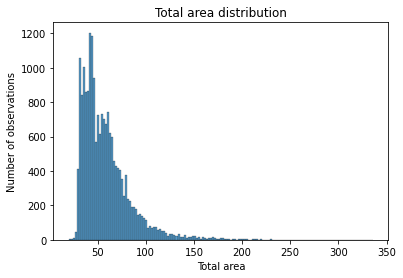

In [153]:
figure = sns.histplot(x=df['total_area'])

figure.set(xlabel = 'Total area', ylabel = 'Number of observations')
plt.title('Total area distribution')
plt.show()

In [154]:
popular_flats = (df
                 .query('30 < total_area < 45')
                 .pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc='median')
)

display(popular_flats.sort_values(by='total_area', ascending=False))

,last_price,total_area
locality_name,,
посёлок Коробицыно,1400000,44.90
посёлок городского типа Тайцы,2200000,44.80
городской посёлок Лесогорский,1050000,44.80
деревня Реброво,1750000,44.60
деревня Заклинье,1450000,44.30
...,...,...
поселок станции Вещево,660000,30.85
поселок Глебычево,1100000,30.70
деревня Чудской Бор,500000,30.70


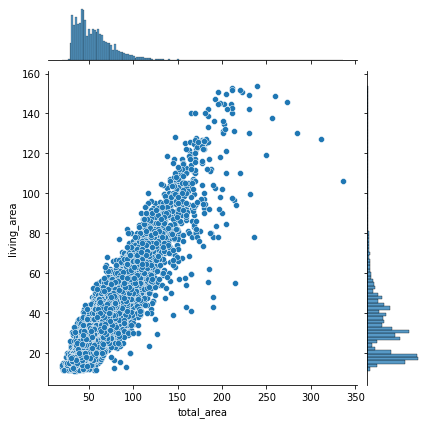

In [155]:
sns.jointplot(x='total_area', y='living_area', 
              data=df, kind='scatter')

plt.show()

In [156]:
print('Correlation between total area and living area:', df['total_area'].corr(df['living_area']))

Correlation between total area and living area: 0.929921169877915


In [157]:
df['living_area'].describe()

count   19,960.00
mean        33.35
std         17.16
min         11.20
25%         18.70
50%         30.00
75%         42.00
max        154.00
Name: living_area, dtype: float64

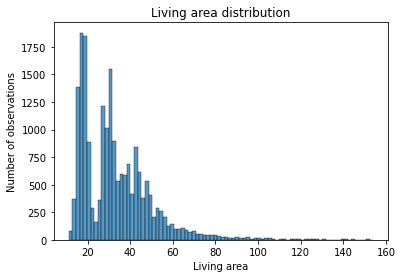

In [158]:
figure = sns.histplot(x=df['living_area'])

figure.set(xlabel = 'Living area', ylabel = 'Number of observations')
plt.title('Living area distribution')
plt.show()

In [159]:
small_flats = (df
                 .query('17 < living_area < 20')
                 .pivot_table(index='locality_name', values=['last_price', 'living_area'], aggfunc='median')
)

display(small_flats.sort_values(by='living_area', ascending=False))

,last_price,living_area
locality_name,,
посёлок Сапёрный,2250000,19.50
поселок Поляны,2100000,19.50
поселок Стеклянный,1950000,19.40
посёлок Сосново,1900000,19.20
посёлок Старая Малукса,1600000,19.10
...,...,...
Волосово,1505000,17.15
деревня Пудомяги,1680000,17.10
поселок городского типа Никольский,700000,17.10


In [160]:
medium_flats = (df
                 .query('27 < living_area < 32')
                 .pivot_table(index='locality_name', values=['last_price', 'living_area'], aggfunc='median')
)

display(medium_flats.sort_values(by='living_area', ascending=False))

,last_price,living_area
locality_name,,
деревня Ваганово,2300000,31.90
деревня Кузьмолово,3800000,31.70
садовое товарищество Рахья,1700000,31.60
деревня Батово,2160000,31.50
поселок Громово,1250000,31.40
...,...,...
поселок Терволово,2400000,27.70
посёлок Сапёрное,1550000,27.70
деревня Ненимяки,2500000,27.70


In [161]:
df['kitchen_area'].describe()

count   19,960.00
mean        10.19
std          4.42
min          5.04
25%          7.10
50%          9.00
75%         11.70
max         39.90
Name: kitchen_area, dtype: float64

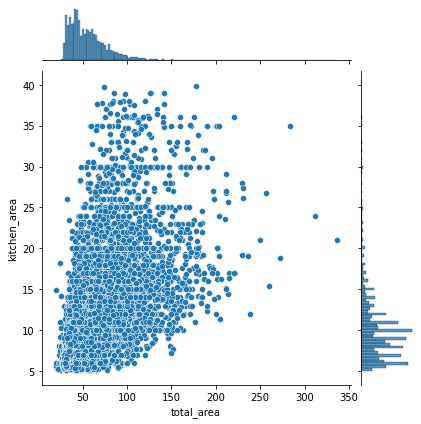

In [162]:
sns.jointplot(x='total_area', y='kitchen_area', 
              data=df, kind='scatter')
plt.show()

In [163]:
print('Correlation between total area and kitchen area:', df['total_area'].corr(df['kitchen_area']))

Correlation between total area and kitchen area: 0.549208439533369


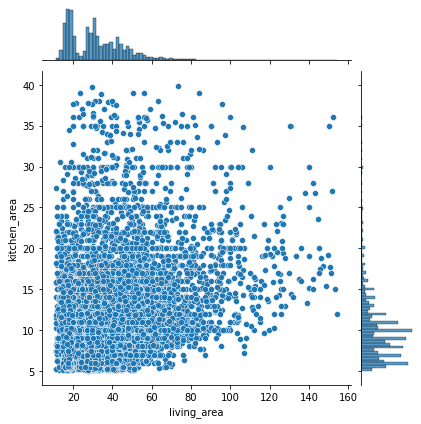

In [164]:
sns.jointplot(x='living_area', y='kitchen_area', 
              data=df, kind='scatter')

plt.show()

In [165]:
print('Correlation between living area and kitchen area:', df['living_area'].corr(df['kitchen_area']))

Correlation between living area and kitchen area: 0.330347944272447


Let's look closely at `kitchen_area` variable.

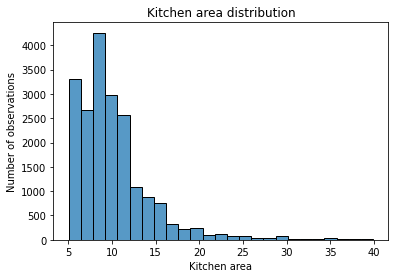

In [166]:
figure = sns.histplot(x=df['kitchen_area'], bins=25)

figure.set(xlabel = 'Kitchen area', ylabel = 'Number of observations')
plt.title('Kitchen area distribution')
plt.show()

Now let's study `last_price` variable.

In [167]:
df['last_price'].describe()

count       19,960.00
mean     5,709,193.00
std      3,728,976.51
min        430,000.00
25%      3,500,000.00
50%      4,690,000.00
75%      6,680,000.00
max     28,570,000.00
Name: last_price, dtype: float64

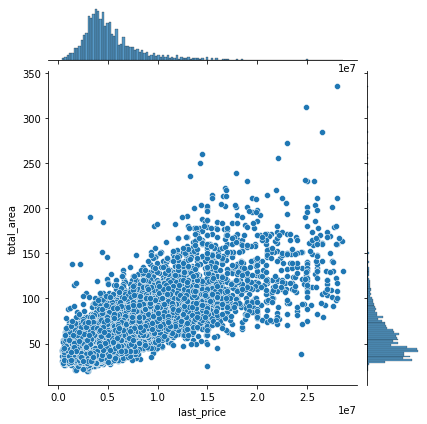

In [168]:
sns.jointplot(x='last_price', y='total_area', 
              data=df, kind='scatter')
plt.show()

In [169]:
print('Correlation between last price and total area:', df['last_price'].corr(df['total_area']))

Correlation between last price and total area: 0.782921934087145


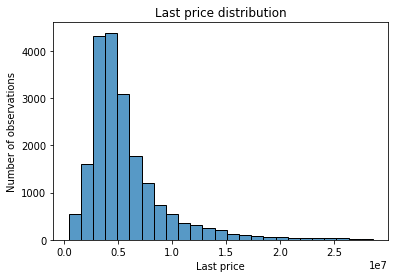

In [170]:
figure = sns.histplot(x=df['last_price'], bins=25)

figure.set(xlabel = 'Last price', ylabel = 'Number of observations')
plt.title('Last price distribution')
plt.show()

Let's move on to the `rooms` variable.

In [171]:
df['rooms'].describe()

count   19,960.00
mean         2.06
std          0.98
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

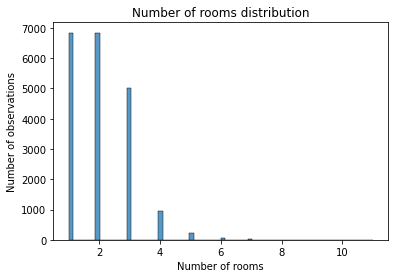

In [172]:
figure = sns.histplot(x=df['rooms'])

figure.set(xlabel = 'Number of rooms', ylabel = 'Number of observations')
plt.title('Number of rooms distribution')
plt.show()

In [173]:
df['ceiling_height'].describe()

count   19,960.00
mean         2.69
std          0.23
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

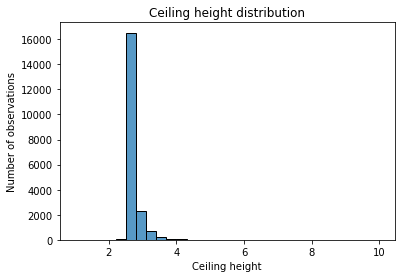

In [174]:
figure = sns.histplot(x=df['ceiling_height'], bins=30)

figure.set(xlabel = 'Ceiling height', ylabel = 'Number of observations')
plt.title('Ceiling height distribution')

plt.show()

In [175]:
df['floor'].describe()

count   19,960.00
mean         5.87
std          4.81
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

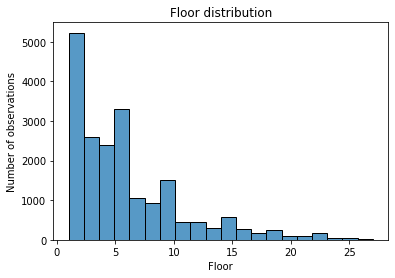

In [176]:
figure = sns.histplot(x=df['floor'], bins=20)

figure.set(xlabel = 'Floor', ylabel = 'Number of observations')
plt.title('Floor distribution')
plt.show()

The majority of flats are at the second or fifth floor.

In [177]:
df['floor_cat'].describe()

count     19960
unique        3
top       other
freq      14749
Name: floor_cat, dtype: object

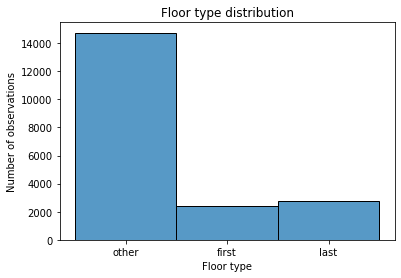

In [178]:
figure = sns.histplot(x=df['floor_cat'])

figure.set(xlabel = 'Floor type', ylabel = 'Number of observations')
plt.title('Floor type distribution')
plt.show()

In [179]:
df['floors_total'].describe()

count   19,960.00
mean        10.66
std          6.46
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: float64

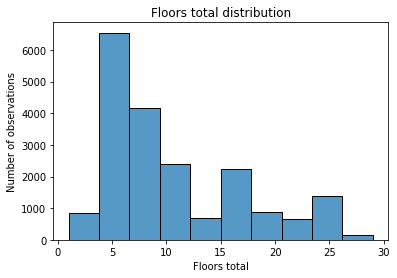

In [180]:
figure = sns.histplot(x=df['floors_total'], bins=10)

figure.set(xlabel = 'Floors total', ylabel = 'Number of observations')
plt.title('Floors total distribution')
plt.show()

There are five floors in the majority of buildings.

The distance to the city center is negatively correlated with the cost of the apartments (correlation is -0.4). The greater the distance to the center, the cheaper the apartment.

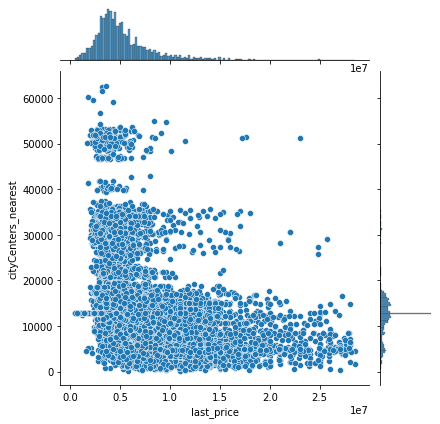

In [181]:
sns.jointplot(x='last_price', y='cityCenters_nearest', 
              data=df, kind='scatter')
plt.show()

In [182]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.30186874688452386

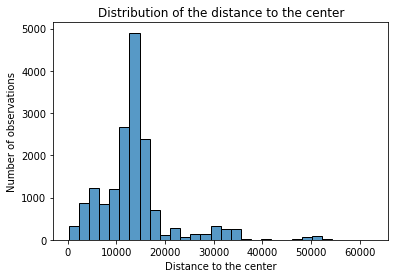

In [215]:
figure = sns.histplot(x=df['cityCenters_nearest'], bins=30)

figure.set(xlabel = 'Distance to the center', ylabel = 'Number of observations')
plt.title('Distribution of the distance to the center')
plt.show()

In [184]:
df['cityCenters_nearest'].describe()

count   16,961.00
mean    13,685.56
std      7,770.63
min        208.00
25%     10,318.00
50%     12,812.50
75%     15,276.00
max     62,706.00
Name: cityCenters_nearest, dtype: float64

Now let's study `airports_nearest` variable. 

In [185]:
df['airports_nearest'].describe()

count   16,415.00
mean    28,668.42
std     12,359.34
min          0.00
25%     18,866.00
50%     25,740.00
75%     36,768.00
max     84,869.00
Name: airports_nearest, dtype: float64

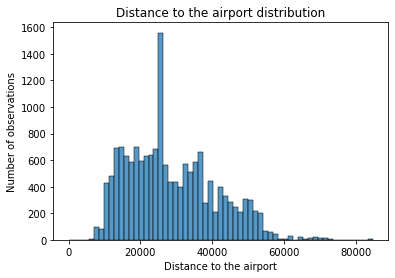

In [186]:
figure = sns.histplot(x=df['airports_nearest'])

figure.set(xlabel = 'Distance to the airport', ylabel = 'Number of observations')
plt.title('Distance to the airport distribution')
plt.show()

Let's look at the `parks_nearest` variable.

In [187]:
df['parks_nearest'].describe()

count   6,801.00
mean      491.50
std       338.62
min         1.00
25%       289.00
50%       456.00
75%       613.00
max     3,190.00
Name: parks_nearest, dtype: float64

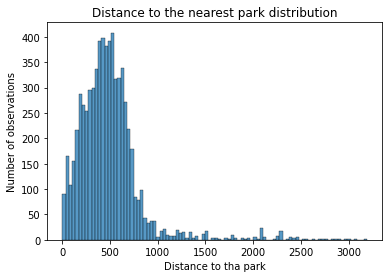

In [188]:
figure = sns.histplot(x=df['parks_nearest'])

figure.set(xlabel = 'Distance to tha park', ylabel = 'Number of observations')
plt.title('Distance to the nearest park distribution')
plt.show()

In [189]:
parks_spot = (df
            .query('400 < parks_nearest < 600')
            .pivot_table(index='locality_name', values='parks_nearest', aggfunc=['mean', 'count'])
)

parks_spot.columns = ['parks_nearest_mean', 'count']
display(parks_spot.sort_values(by='parks_nearest_mean', ascending=True).head(10))

,parks_nearest_mean,count
locality_name,,
Кронштадт,470.91,23
Сестрорецк,483.81,16
Красное Село,484.00,16
Пушкин,484.60,45
Колпино,492.50,34
Санкт-Петербург,497.73,1991
Ломоносов,501.33,6
Петергоф,502.31,29
unknown,510.00,4


Now look at the `ponds_nearest` variable.

In [190]:
df['ponds_nearest'].describe()

count   7,569.00
mean      525.10
std       276.41
min        13.00
25%       303.00
50%       510.00
75%       734.00
max     1,344.00
Name: ponds_nearest, dtype: float64

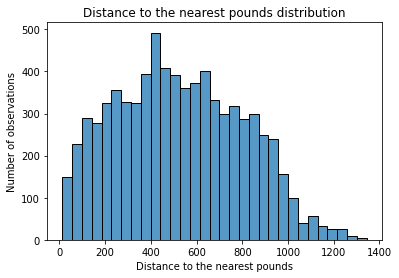

In [191]:
figure = sns.histplot(x=df['ponds_nearest'])

figure.set(xlabel = 'Distance to the nearest pounds', ylabel = 'Number of observations')
plt.title('Distance to the nearest pounds distribution')
plt.show()

Finally, let's study the frequency of ads posting. Most ads were published on Tuesdays and Thursdays. There are fewer publications on the weekend. 

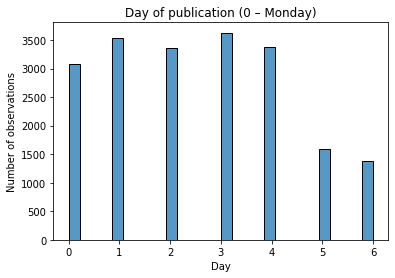

In [192]:
figure = sns.histplot(x=df['day_of_exposition'])

figure.set(xlabel = 'Day', ylabel = 'Number of observations')
plt.title('Day of publication (0 – Monday)')
plt.show()

The majority of ads were published on February. From February to July, there is a decline in publication activity. But from July to November, the number of ads is growing.

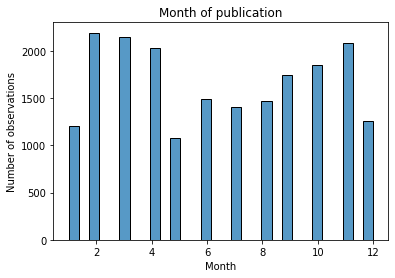

In [193]:
figure = sns.histplot(x=df['month_of_exposition'], bins=30)

figure.set(xlabel = 'Month', ylabel = 'Number of observations')
plt.title('Month of publication')
plt.show()

### Sales velocity

Many apartments are sold for 45 or 60 days. It might be connected to a technical feature of the platform itself: the platform might automatically remove ads if the user does not renew it.

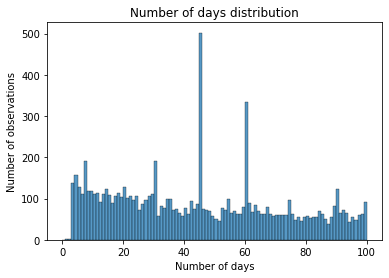

In [194]:
figure = sns.histplot(x=df['days_exposition'], binrange=(0,100), bins=100)

figure.set(xlabel = 'Number of days', ylabel = 'Number of observations')
plt.title('Number of days distribution')
plt.show()

In [195]:
df['days_exposition'].describe()

count   17,264.00
mean       183.84
std        219.95
min          1.00
25%         44.00
50%        101.00
75%        237.00
max      1,580.00
Name: days_exposition, dtype: float64

In [196]:
print('Mean value for "days_exposition":', df['days_exposition'].describe()[1])
print('Median value for "days_exposition":', df['days_exposition'].describe()[5])

Mean value for "days_exposition": 183.83705977757182
Median value for "days_exposition": 101.0


Apartments are commonly sold within 183 days (median 101 days). Long sales are those that take more than 237 days. Apartments that are sold in less than 44 days can be considered as fast sales. Most often apartments are sold in 45 days. Also, owners often manage to sell an apartment in two months (60 days).

### Factors affecting the total price of the apartments

Let's study how the total area, living area, kitchen area are correlated with the total price of the apartment.

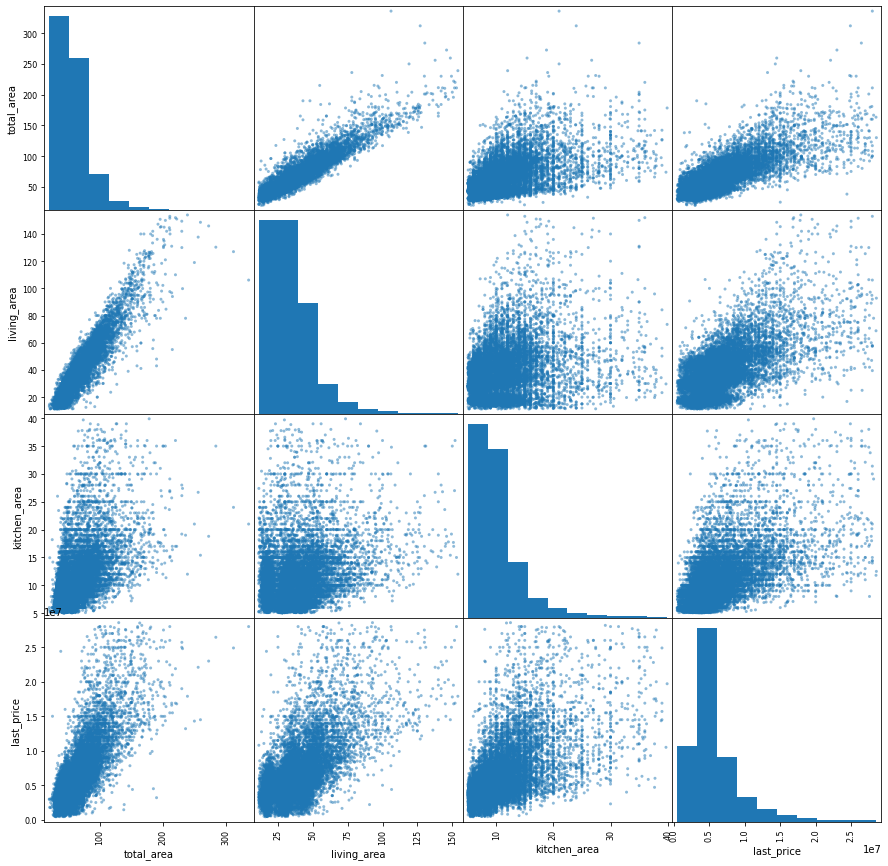

In [197]:
pd.plotting.scatter_matrix(df[['total_area', 'living_area', 'kitchen_area', 'last_price']], figsize=(15,15))
plt.show()

In [198]:
print('Correlation between price and total area:', df['last_price'].corr(df['total_area']))

Correlation between price and total area: 0.782921934087145


In [199]:
print('Correlation between price and living area:', df['last_price'].corr(df['living_area']))

Correlation between price and living area: 0.6800219604720528


In [200]:
print('Correlation between price and kitchen area:', df['last_price'].corr(df['kitchen_area']))

Correlation between price and kitchen area: 0.5941768551884927


The scatterplot shows that there is a positive relationship between the total area, living area, kitchen area and the price of the object. With the growth of the area, the price of the object increases. The strength of the relationship varies. The relationship between the total area and the price is average: the correlation coefficient is 0.78. There is an average correlation between price and living area (0.68), between price and kitchen area the correlation is even weaker (0.59).

Let's study how the number of rooms and type of floor are correlated with the total price.

In [201]:
print('Correlation between price and number of rooms', df['last_price'].corr(df['rooms']))

Correlation between price and number of rooms 0.5140329270692124


In [202]:
def floor_cat_num(series):
    if series == 'first':
        return 0
    elif series == 'last':
        return 2
    else:
        return 1

df['floor_cat_num'] = df['floor_cat'].apply(floor_cat_num)
display(df[['floor_cat', 'floor_cat_num']].head(10))

,floor_cat,floor_cat_num
0,other,1
1,first,0
2,other,1
3,other,1
4,other,1
5,other,1
6,other,1
7,other,1
8,last,2
9,last,2


In [203]:
print('Correlation between price and floor type:', df['last_price'].corr(df['floor_cat_num']))

Correlation between price and floor type: 0.0548629132433293


There is no correlation between price and floor type (correlation coefficient less than 0.05). Correlation between the price and the number of rooms is 0.51. The more rooms, the higher the price.

Finally, let's study how the variables day of the week, month, year are correlated to the total price.

In [204]:
print('Correlation between price and day of publication:', df['last_price'].corr(df['day_of_exposition']))

Correlation between price and day of publication: -0.021285178791057992


In [205]:
print('Correlation between price and month of publication:', df['last_price'].corr(df['month_of_exposition']))

Correlation between price and month of publication: -0.0006437356941020822


In [206]:
print('Correlation between price and year of publication:', df['last_price'].corr(df['year_of_exposition']))

Correlation between price and year of publication: -0.034148920011029434


There is no correlation between the day of the week, month, year and price (the correlation coefficient is less than 0.05).

### Localities with the highest and lowest price per meter squared

In [207]:
lots_exposition = (df
                   .pivot_table(index='locality_name', values='one_metre_price', aggfunc=['median', 'count'])
)

lots_exposition.columns = ['median_one_metre_price', 'count']

lots_exposition = lots_exposition.sort_values(by='count', ascending=False).head(10)


display(lots_exposition.sort_values(by='median_one_metre_price', ascending=False))

,median_one_metre_price,count
locality_name,,
Санкт-Петербург,"103,367.88",13369
Пушкин,"100,133.51",299
посёлок Парголово,"92,142.86",281
деревня Кудрово,"91,499.17",224
посёлок Мурино,"84,375.00",393
Петергоф,"81,944.44",185
посёлок Шушары,"77,312.83",380
Колпино,"74,866.55",312
Гатчина,"68,604.65",263


In [208]:
print('Mean price:', lots_exposition['median_one_metre_price'].mean())

Mean price: 84003.63651329554


The mean price per meter squared of 10 locations with the highest number of ads is 84004 rubls. The most expencive locations are St. Petersburg, Pushkin, Kudrovo. The less expensive locations are Vsevolozhsk, Gatchina, Kolpino.

### Mean price of each km from the center (in St. Petersburg)

In [209]:
spb_flats = df.query('locality_name == "Санкт-Петербург"')[['locality_name', 'cityCenters_nearest_km', 'last_price']]

display(spb_flats.head())

,locality_name,cityCenters_nearest_km,last_price
0,Санкт-Петербург,16.00,13000000
2,Санкт-Петербург,14.00,5196000
5,Санкт-Петербург,15.00,5400000
6,Санкт-Петербург,14.00,5050000
11,Санкт-Петербург,14.00,4650000


In [210]:
spb_flats['one_km_price'] = spb_flats['last_price']/spb_flats['cityCenters_nearest_km']

display(spb_flats.head())

,locality_name,cityCenters_nearest_km,last_price,one_km_price
0,Санкт-Петербург,16.00,13000000,"812,500.00"
2,Санкт-Петербург,14.00,5196000,"371,142.86"
5,Санкт-Петербург,15.00,5400000,"360,000.00"
6,Санкт-Петербург,14.00,5050000,"360,714.29"
11,Санкт-Петербург,14.00,4650000,"332,142.86"


In [211]:
print('Mean price of each km:', np.mean(spb_flats['one_km_price'][np.isfinite(spb_flats['one_km_price'])]))

Mean price of each km: 962885.7190432395


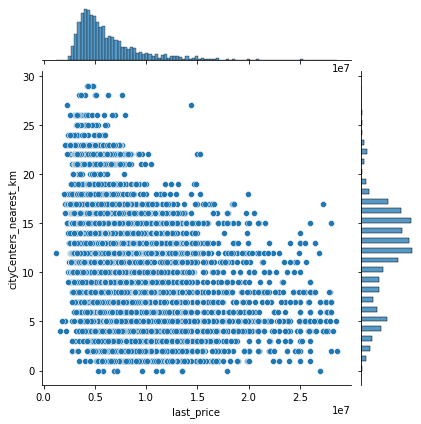

In [212]:
sns.jointplot(x='last_price', y='cityCenters_nearest_km', 
              data=spb_flats, kind='scatter')
plt.show()

In [213]:
print('Correlation between price and distance to the city center',spb_flats['last_price'].corr(spb_flats['cityCenters_nearest_km']))

Correlation between price and distance to the city center -0.41864658980748354


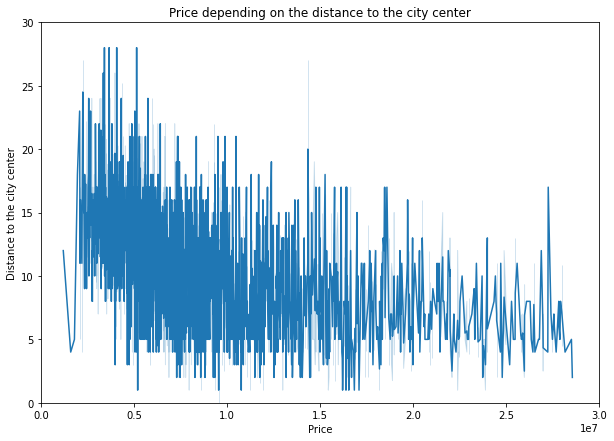

In [214]:
plt.figure(figsize=(10, 7))
plt.xlim(0,30000000)
plt.ylim(0,30)
sns.lineplot(x='last_price', y='cityCenters_nearest_km', data=spb_flats)
plt.xlabel('Price')
plt.ylabel('Distance to the city center')
plt.title('Price depending on the distance to the city center');

With the increase of the distance to the city center, the price of the apartments decreases. Correlation is weak 0.42.

### Conclusion

At the first stage of the analysis we dropped duplicates from `locality_name` variable, filled missing values in `living_area`, `kitchen_area`, `floors_total`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` and `days_exposition` variables. We also identified outliers in these variables and removed them when it was possible. We tried not to affect the original distribution of the data. Then the data type of the variables `floors_total`, `balcony`, `is_apartment`, `studio`, `open_plan` and `first_day_exposition` has been changed. Next, the distribution of key variables was studied. At the next stage, we conducted an exploratory data analysis. The distribution of most variables is right-skewed. Many variables are correlated.

Firstly, we studied sales velocity. On average, apartments are sold in 183 days (median - 101 days). Unusually long sales are those that take more than 237 days. Apartments that are sold in less than 44 days can be regarded as fast sales. Most often apartments are sold in 45 days. Also, owners often manage to sell an apartment in two months (60 days).

Secondly, we studied the factors that affect the cost of apartments. There is a positive relationship between the total area, living area, kitchen area and the price of the appartments: the larger the area, the higher the price. The strength of the relationship varies. The correlation between the total area and the price is 0.75, correlation between price and living area is 0.63, between price and kitchen area the correlation is weaker – 0.56. There is no correlation between price and floor type (correlation coefficient less than 0.05). There is correlation between the price and the number of rooms (0.46): the more rooms, the higher price. There is no correlation between the day of the week, month, year and price (the correlation coefficient is less than 0.05).

Based on the results of the analysis, we identified the locations with the highest and lowest price for appartments. The mean price per meter squared in top-10 (based on the number of ads) locations is 84004. Most expensive locations are St. Petersburg, Pushkin, Kudrovo, less expensive – Vsevolozhsk, Gatchina, Kolpino.

Finally, we calculated the average price per kilometer from the center of St. Petersburg. The average price of each km is ~96.2 thousand. It means that in average people pay extra 96.2 thousand of rubles for each km to live closer to the city center. The `cityCenters_nearest` variable is weakly correlated with the `last_price` variable (correlation coefficient 0.4). With the increase of the distance to the city center, the price of the apartments decreases.